In [115]:
import numpy as np
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
img = cv2.imread("../images/phantom.png",0)
img = cv2.resize(img,(480,480))
# img2 = cv2.imread("../images/f.png",0)
# img2 = cv2.resize(img2,(480,480))
# img2 = cv2.GaussianBlur(img2,(15,15),0)
# # img = np.ones((480,480), dtype='uint8')*255
# plt.rcParams["figure.figsize"] = [10, 10]
# plt.subplot(121)
# plt.imshow(img,cmap='gray')
# plt.subplot(122)
# plt.imshow(img2,cmap='gray')

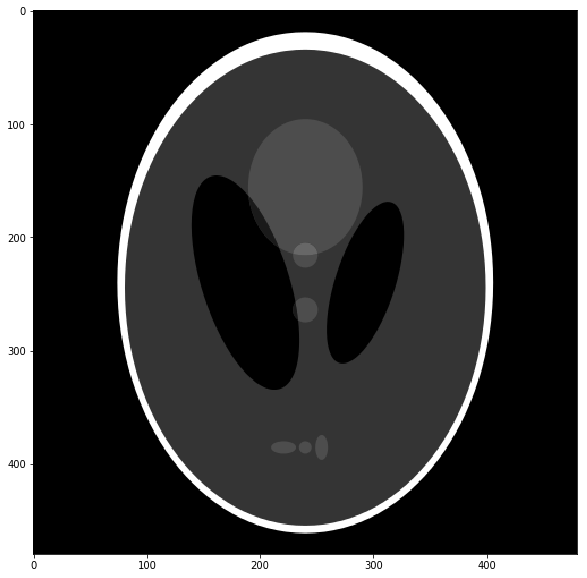

In [164]:
plt.imshow(img, cmap='gray')
# img2 = cv2.GaussianBlur(img2,(5,5),0)


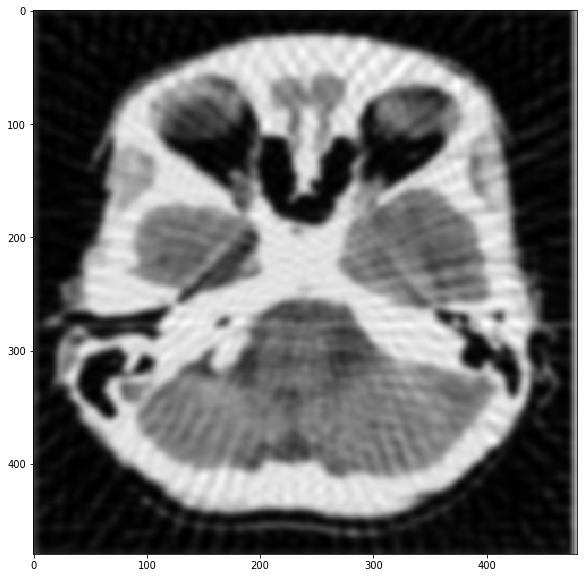

In [165]:
plt.imshow(img2, cmap='gray')


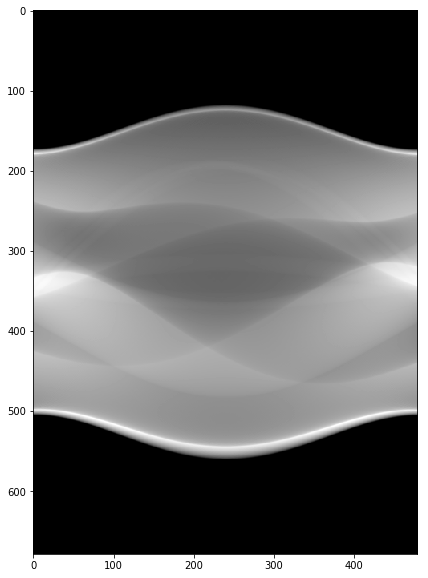

In [166]:
theta0 = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram0 = radon(img, theta=theta0, circle=False)
plt.imshow(sinogram0, cmap='gray')

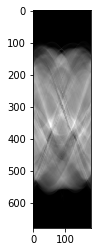

In [119]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
sinogram1 = radon(img, theta=theta1, circle=False)
plt.imshow(sinogram1, cmap='gray')

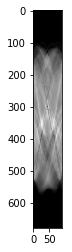

In [120]:
theta2 = np.linspace(0., 180., 90, endpoint=False)
sinogram2 = radon(img, theta=theta2, circle=False)
plt.imshow(sinogram2, cmap='gray')

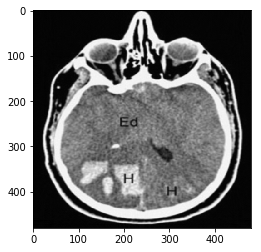

In [82]:
fbp0 = iradon(sinogram0, theta=theta0, circle=False)
plt.imshow(fbp0, cmap = 'gray')

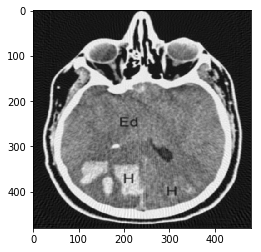

In [83]:
fbp1 = iradon(sinogram1, theta=theta1, circle=False)
plt.imshow(fbp1, cmap = 'gray')

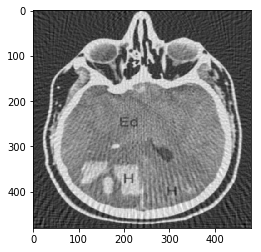

In [84]:
fbp2 = iradon(sinogram2, theta=theta2, circle=False)
plt.imshow(fbp2, cmap = 'gray')

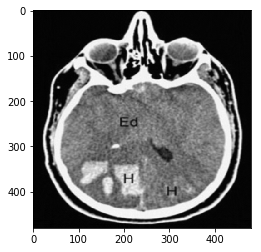

In [89]:
x0 = np.zeros((480,480), dtype='float64')
ATA0 =  iradon(radon(np.ones((480,480)),theta=theta0,circle=False),theta=theta0,circle=False)
x0+=iradon((sinogram0 - radon(x0,theta=theta0,circle=False)),theta=theta0,circle=False)/ATA0
plt.imshow(x0,cmap='gray')

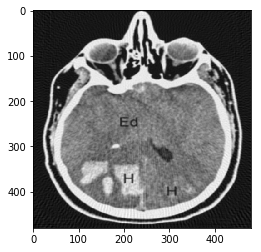

In [90]:
x1 = np.zeros((480,480), dtype='float64')
ATA1 =  iradon(radon(np.ones((480,480)),theta=theta1,circle=False),theta=theta1,circle=False)
x1+=iradon((sinogram1 - radon(x1,theta=theta1,circle=False)),theta=theta1,circle=False)/ATA1
plt.imshow(x1,cmap='gray')

0
95.03790347220487
1
76.03026481245716
2
60.97177830265316
3
49.05948468946403
4
39.666527899792854
5
32.299689577852824
6
26.56867247357891
7
22.16176143629227
8
18.825925667048953
9
16.35058034130809
10
14.555893881379347
11
13.2863948547853
12
12.409463232381608
13
11.816114798983127
14
11.421188632086961
15
11.16143553255589
16
10.99189929857935
17
10.881693031558077
18
10.810115430439959
19
10.763525434601979
20
10.733037203710191
21
10.712904646440244
i limit reached


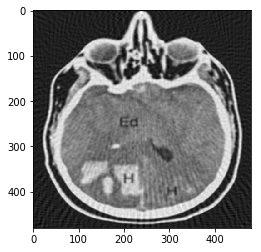

In [91]:
x2 = np.zeros((480,480), dtype='float64')
ATA2 =  iradon(radon(np.ones((480,480)),theta=theta2,circle=False),theta=theta2,circle=False)
i=0
flag=True
while(flag):
    print(i)
    x2+=0.2*iradon((sinogram2 - radon(x2,theta=theta2,circle=False)),theta=theta2,circle=False)/ATA2
    mse=np.sqrt(np.mean((x2-img)**2))
    print(mse)
    if mse<9:
        print('mse limit reached')
        flag=False
    if i>20:
        print('i limit reached')
        flag=False
    i+=1
plt.imshow(x2,cmap='gray')

In [92]:
error1 = fbp2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 15


In [93]:
error1 = x2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 10.7


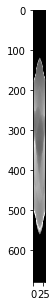

In [168]:
theta3 = np.linspace(0., 180., 30, endpoint=False)
sinogram3 = radon(img, theta=theta3, circle=False)
plt.imshow(sinogram3, cmap='gray')

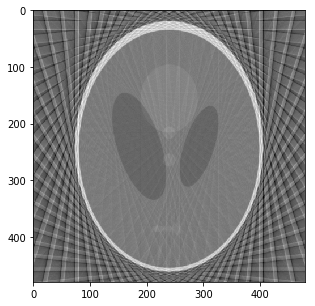

In [169]:
fbp3 = iradon(sinogram3, theta=theta3, circle=False)
plt.imshow(fbp3, cmap = 'gray')

In [170]:
error3 = fbp3 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error3**2)))

FBP rms reconstruction error: 40


0
1e+100
10
60.4180563402062
20
58.17801430846573
30
56.07663925184158
40
54.09983077045126
50
52.23650932985664
60
50.47765951077013
70
48.8157458729131
80
47.24433092909183
90
45.75781377068513
100
44.3512451423438
110
43.02019304514347
120
41.76064285631597
130
40.56892168281427
140
39.441640135560455
150
38.37564689022185
160
37.36799281061844
170
36.41590234714682
180
35.51675055784725
190
34.66804453873526
200
33.86740835812781
210
33.112570808764296
220
32.40135544900105
230
31.731672518659046
240
31.10151239883138
250
30.50894034690321
260
29.952092284428804
270
29.429171450815844
29.278650410018326


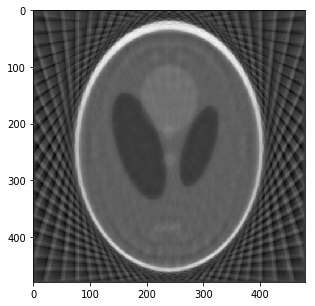

In [171]:
x3 = np.zeros((480,480), dtype='float64')
f0 = np.zeros((480,480), dtype='float64')
ATA3 =  iradon(radon(np.ones((480,480),dtype="uint8")*255,theta=theta3,circle=False),theta=theta3,circle=False)
i=0
flag=True
error = 1e100
while(flag):
    if(i%10==0):
        print(i)
        print(error)
    temp = x3
    temp+=1*iradon((sinogram3 - radon(temp,theta=theta3,circle=False)),theta=theta3,circle=False)/ATA3
    grad_des_img1 = temp 
    grad_des_img2 = np.zeros(np.shape(temp), dtype='float64')
    for j in range(5):
        delta_img = grad2(grad_des_img1,i+1) + 0.1
        delta = delta_img * np.abs(temp - f0)/np.abs(delta_img)
#         print(delta)
        grad_des_img2 = grad_des_img1 - 0.5 * delta
        grad_des_img1 = grad_des_img2
    
#     print(grad_des_img2)
    f0 = grad_des_img2
    temp = grad_des_img2
    
    mse=np.sqrt(np.mean((temp-img)**2))
    if(mse-error>-0.05):
#     if(i>1000):
        print(mse)    
        flag = False
    else:
        x3 = temp
        error = mse
    i+=1
plt.imshow(x3,cmap='gray')

In [177]:
temp[temp<0] = 0
fbp3[fbp3<0] = 0
# plt.imshow(temp,cmap='gray')
fbp3 = cv2.GaussianBlur(fbp3,(5,5),0)

# reconstruction_sart = iradon_sart(sinogram3, theta=theta3)
# plt.imshow(reconstruction_sart, cmap='gray')

In [144]:
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# temp = cv2.filter2D(temp, -1, kernel)
# temp = (temp - np.min(temp))
# temp = (temp/np.max(temp))*255


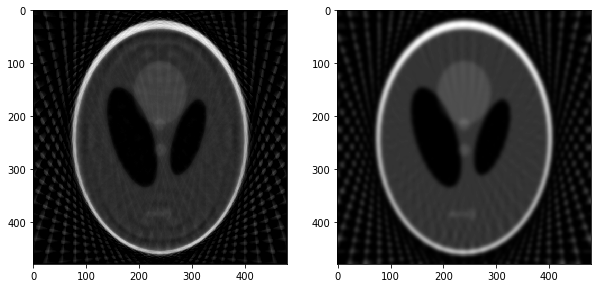

In [178]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(121)
plt.imshow(temp,cmap='gray')
plt.subplot(122)
plt.imshow(fbp3,cmap='gray')

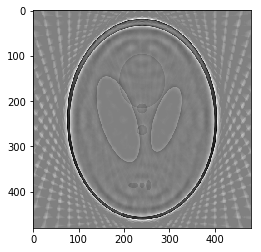

In [54]:
plt.imshow(temp - img,cmap='gray')

In [70]:
def grad2(img,itern):
    ep = 0.0001
    r,c = np.shape(img)
#     print(r,c)
    img = np.pad(img, (1,1), 'constant', constant_values=(0, 0))
    
    grad2_img = np.zeros((r,c),dtype='uint8')
    
    hw = img[1:r+1,1:c+1]
    hp1 = img[2:,1:c+1]
    wp1 = img[1:r+1,2:]
    hs1 = img[0:r,1:c+1]
    hs1wp1 = img[0:r,2:]
    ws1 = img[1:r+1,0:c]
    hp1ws1 = img[2:,0:c]
    
    n1 = 2*hw - hp1 - wp1
    d1 = np.sqrt((hp1 - hw)**2 + (wp1 - hw)**2 + ep)
    n2 = hw - hs1
    d2 = np.sqrt((hw - hs1)**2 + (hs1wp1 - hs1)**2 + ep)
    n3 = hw - ws1
    d3 = np.sqrt((hp1ws1 - ws1)**2 + (hw - ws1)**2 + ep)
    
    ans = n1/d1 + n2/d2 + n3/d3 
            
    
            
    
    
#     for i in range(r):
# #         print(i)
#         for j in range(c):
# #             print(j)
#             h = i+1
#             w = j+1
#             n1 = 2*img[h,w] - img[h + 1,w] - img[h,w+1]
#             d1 = np.sqrt(ep + (img[h + 1,w] - img[h,w])**2 + (img[h,w+1] - img[h,w])**2 )
#             n2 = img[h,w] - img[h-1,w]
#             d2 = np.sqrt(ep + (img[h,w] - img[h-1,w])**2 + (img[h-1,w+1] - img[h-1,w])**2 )
#             n3 = img[h,w] - img[h,w-1]
#             d3 = np.sqrt(ep + (img[h+1,w-1] - img[h,w-1])**2 + (img[h,w] - img[h,w-1])**2 )
# #             if(itern == 2):
# #                 print(img[h,w],d1,n2,d2,n3,d3)
# #                 import pdb;pdb.set_trace()
#             grad2_img[i][j]= n1/d1 + n2/d2 + n3/d3
            
    return ans

4741405.327830245